# 17IT005
Practical 1: Data Preprocessing in Python using Scikit Learn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


In [ ]:
df=pd.read_csv('data.csv',na_values=['?'])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,NaN,NaN,NaN,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,NaN,NaN,6.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160.0,331.0,0.0,0.0,94.0,1.0,2.5,NaN,NaN,NaN,1
290,54,0,3,130.0,294.0,0.0,1.0,100.0,1.0,0.0,2.0,NaN,NaN,1
291,56,1,4,155.0,342.0,1.0,0.0,150.0,1.0,3.0,2.0,NaN,NaN,1
292,58,0,2,180.0,393.0,0.0,0.0,110.0,1.0,1.0,2.0,NaN,7.0,1


In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8827f5abe0>,
      dtype=object)

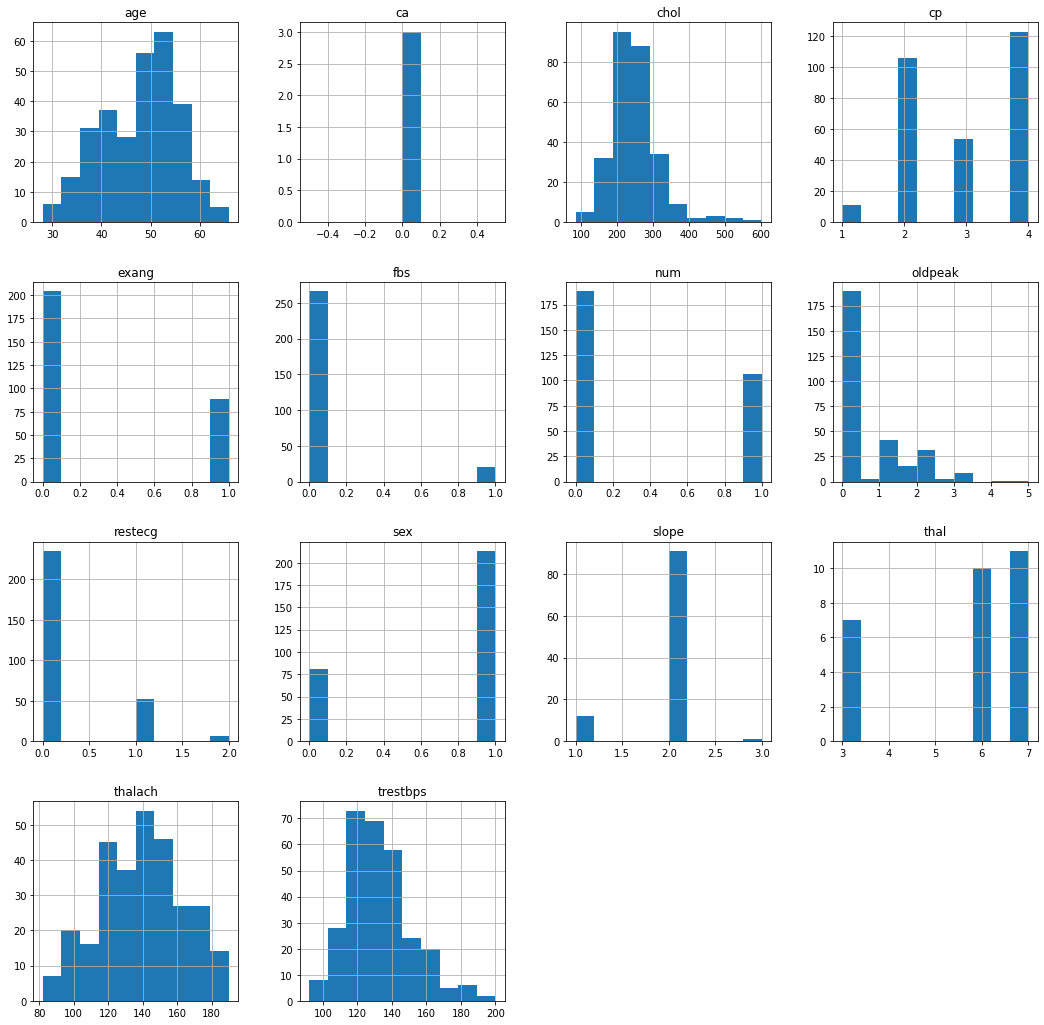

In [ ]:
df.hist(figsize=[18,18])

In [ ]:
df.drop(columns=['ca'],inplace=True)

In [ ]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
thal        266
num           0
dtype: int64

In [ ]:
df.fillna(df.median(),inplace=True)

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [ ]:
df.duplicated().sum()

1

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(293, 13)

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [ ]:
x=df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'thal']]
y = df['num']
X_train,X_test,Y_train,Y_test = train_test_split(df,y,test_size=0.2)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(234, 13)
(234,)
(59, 13)
(59,)


### Before Preprocessing 

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
accuracy_score(Y_test,knn.predict(X_test))

0.7288135593220338

### Applying Feature Scaling

In [ ]:
min_max=MinMaxScaler()
X_train_minmax=min_max.fit_transform(X_train[['trestbps','chol','thalach']])
X_test_minmax=min_max.fit_transform(X_test[['trestbps','chol','thalach']])

In [ ]:
del knn
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_minmax,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
accuracy_score(Y_test,knn.predict(X_test_minmax))

0.7457627118644068

### Applying Feature Standardization

In [ ]:
X_train_scale = scale(X_train[['trestbps','chol','thalach']])
X_test_scale = scale(X_test[['trestbps','chol','thalach']])

In [ ]:
log=LogisticRegression()

In [ ]:
log.fit(X_train_scale,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
accuracy_score(Y_test,log.predict(X_test_scale))

0.6779661016949152

### Applying One-Hot Encoding

In [ ]:
enc=OneHotEncoder(sparse=False)

In [ ]:
len(df['num'].unique())

2

In [ ]:
X_train_1=X_train
X_test_1=X_test
columns=['sex', 'cp','fbs', 'restecg', 'exang', 'oldpeak', 'slope', 'thal']

In [ ]:
for col in columns:
    data=X_train[[col]].append(X_test[[col]])
    enc.fit(data)
    # Fitting One Hot Encoding on train data
    temp = enc.transform(X_train[[col]])
    # Changing the encoded features into a data frame with new column names
    temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col].value_counts().index])
    # In side by side concatenation index values should be same
    # Setting the index values similar to the X_train data frame
    temp=temp.set_index(X_train.index.values)
    # adding the new One Hot Encoded varibales to the train data frame
    X_train_1=pd.concat([X_train_1,temp],axis=1)
    # fitting One Hot Encoding on test data
    temp = enc.transform(X_test[[col]])
    # changing it into data frame and adding column names
    temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col].value_counts().index])
    # Setting the index for proper concatenation
    temp=temp.set_index(X_test.index.values)
    # adding the new One Hot Encoded varibales to test data frame
    X_test_1=pd.concat([X_test_1,temp],axis=1)
X_train_1.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'thal', 'num', 'sex_1', 'sex_0', 'cp_4',
       'cp_2', 'cp_3', 'cp_1', 'fbs_0.0', 'fbs_1.0', 'restecg_0.0',
       'restecg_1.0', 'restecg_2.0', 'exang_0.0', 'exang_1.0', 'oldpeak_0.0',
       'oldpeak_1.0', 'oldpeak_2.0', 'oldpeak_1.5', 'oldpeak_3.0',
       'oldpeak_2.5', 'oldpeak_0.5', 'oldpeak_0.8', 'oldpeak_5.0',
       'oldpeak_4.0', 'slope_2.0', 'slope_1.0', 'slope_3.0', 'thal_6.0',
       'thal_7.0', 'thal_3.0'],
      dtype='object')

In [ ]:
X_train_scale=scale(X_train_1)
X_test_scale=scale(X_test_1)
log.fit(X_train_scale,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
accuracy_score(Y_test,log.predict(X_test_scale))

NameError: ignored